# 泰坦尼克号生还预测问题

来源：https://www.kaggle.com/c/titanic/data

基本步骤：
1. Data Viewing 剖析数据
2. Data Preprocessing 数据预处理
3. Modeling 建模
4. Hyper-parameter Tuning 调参
5. Ensemble Model 集成模型


## 1. Data Viewing 剖析数据
以可视化/统计各种方式检查拿到的数据

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.0.3'

In [3]:
pd.options.display.max_columns = 50

In [4]:
train_df = pd.read_csv("data/train.csv", index_col="PassengerId")
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.shape

(891, 11)

In [6]:
test_df = pd.read_csv("data/test.csv", index_col="PassengerId")
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_df.shape

(418, 10)

In [8]:
# 检查数据类型，有不少数字型数据和类别型数据
train_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
from pandas_profiling import ProfileReport

# 生成pandas profiling
profile = ProfileReport(
    train_df, title="Pandas Profiling Report", html={"style": {"full_width": True}}
)

# 保存到HTML
profile.to_file(output_file="titanic_train.html")

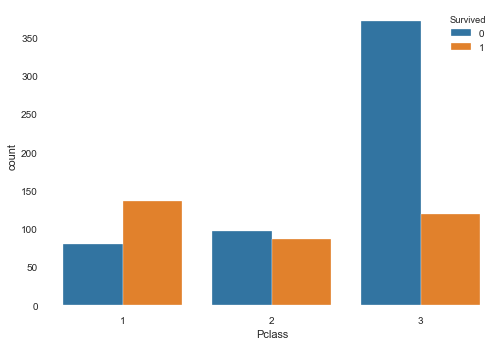

In [10]:
import seaborn as sns
# Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
sns.countplot(x="Pclass", data=train_df, hue="Survived")

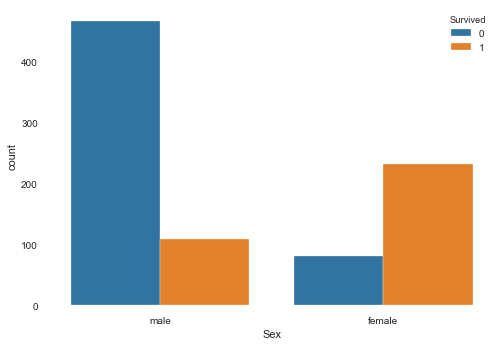

In [11]:
sns.countplot(x="Sex", data=train_df, hue="Survived")

In [12]:
# Age, 177 missing value
print(train_df.Age.isnull().sum())
train_df[train_df.Age.isnull()].head()

177


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


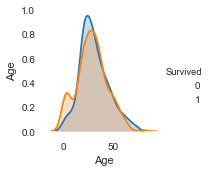

In [13]:
# 对于Age不是null的部分画出具体分布图
sns.pairplot(train_df[np.logical_not(train_df.Age.isnull())], hue="Survived", vars=['Age'])

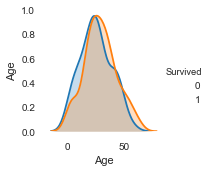

In [14]:
# 女性的Age 和 有没有获救的 分布图
sns.pairplot(train_df[np.logical_and(np.logical_not(train_df.Age.isnull()),train_df.Sex == "female")], hue="Survived", vars=['Age'])

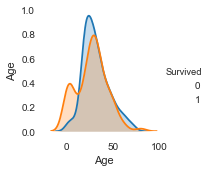

In [15]:
# 男性的Age 和 有没有获救的 分布图
sns.pairplot(train_df[np.logical_and(np.logical_not(train_df.Age.isnull()),train_df.Sex == "male")], hue="Survived", vars=['Age'])

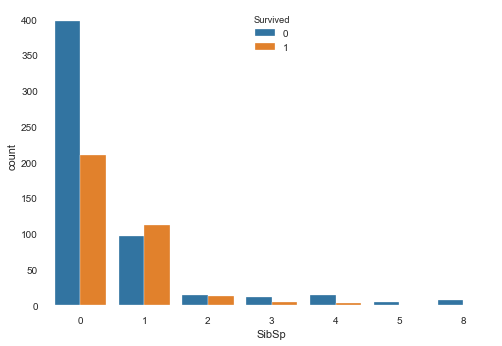

In [16]:
# SibSp 兄弟姐妹+配偶数量
sns.countplot(x="SibSp", data=train_df, hue="Survived")

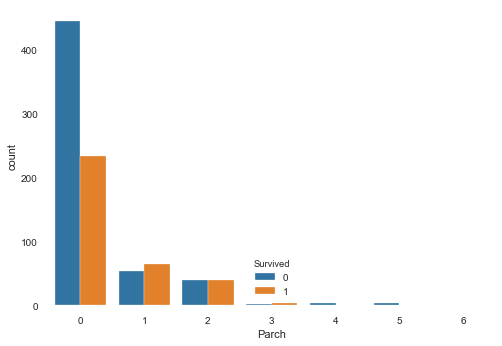

In [17]:
# Parch 父母+孩子数量
sns.countplot(x="Parch", data=train_df, hue="Survived")

In [18]:
# Ticket number
# 有些人的票号是一样的

train_df.Ticket  

PassengerId
1             A/5 21171
2              PC 17599
3      STON/O2. 3101282
4                113803
5                373450
             ...       
887              211536
888              112053
889          W./C. 6607
890              111369
891              370376
Name: Ticket, Length: 891, dtype: object

In [19]:
# 票号除了全是数字之外还有一些前缀
# 查看票号的有几个部分

parts_count = []
for ticket in train_df.Ticket:
    parts_count.append(len(ticket.split()))
    
train_df['ticket_parts_count'] = parts_count
train_df.ticket_parts_count.value_counts()

1    665
2    213
3     13
Name: ticket_parts_count, dtype: int64

In [20]:
# 只有一个部分的票号，检查是不是全部只有数字
for ticket in train_df[train_df.ticket_parts_count == 1].Ticket:
    if not ticket.isnumeric():
        print(ticket)

LINE
LINE
LINE
LINE


In [21]:
# 有2个部分的票号，检查是不是全部只有数字
for ticket in train_df[train_df.ticket_parts_count == 1].Ticket:
    if not ticket.isnumeric():
        print(ticket)

LINE
LINE
LINE
LINE


In [22]:
# 有15个Passenger Fare 为0，是水手的意思吗？
train_df[train_df.Fare == 0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_parts_count
PassengerId,,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,1
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,1
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,1
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,1
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,1
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,1
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,1
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,1
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,1


In [23]:
# 有687个缺损值 占 77.1%
train_df.Cabin

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

In [24]:
# Cabin 房间号

parts_count = []
for cabin in train_df.Cabin:
    if type(cabin) != float:
        parts_count.append(len(cabin.split()))
    else:
        parts_count.append(0)
    
train_df['cabin_count'] = parts_count
train_df.cabin_count.value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_count, dtype: int64

In [25]:
train_df[train_df.cabin_count==2]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_parts_count,cabin_count
PassengerId,,,,,,,,,,,,,
76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S,1,2
98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C,2,2
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C,2,2
129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,1,2
298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,1,2
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C,2,2
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,1,2
391,1,1,"Carter, Mr. William Ernest",male,36.00,1,2,113760,120.0000,B96 B98,S,1,2
436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S,1,2


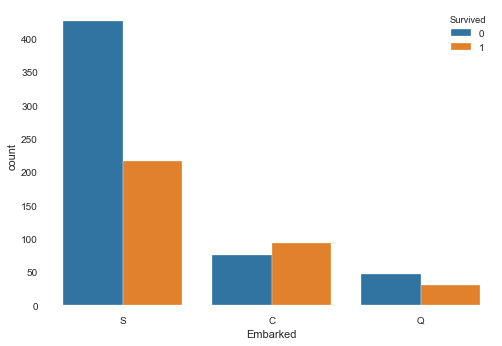

In [26]:
# Embarked 入境口，有2个缺损值
sns.countplot(x="Embarked", data=train_df[np.logical_not(train_df.Embarked.isnull())], hue="Survived")

In [27]:
train_df[train_df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_parts_count,cabin_count
PassengerId,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,1
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,1


## Data Preprocessing 数据预处理

目的：清理数据，对于数据做一些适当的处理使之可以让模型训练

时间：25-30分钟

1. 处理缺损值/Outlier
2. 若有必要转换类别型数据
3. 特征工程，生成有意义的特征
4. 分成不同数据集，training evaluation testing (此次测试数据集使用网站上准备的test.csv)
5. 缩放数据：归一化，标准化等等


In [ ]:
# 处理票号？
# 处理Cabin？

## Modeling 建模 + 调参

时间：25分钟 

- Titanic的模型评估方法为Accuracy
- 建模（必须）+ 使用Grid Search调整超参数： 
    - SVM 
    - 逻辑回归 
    - KNN 
    - Decision Tree 
- 建模（选做）： 
    - Random Forest


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
feature_cols = test_df.columns.tolist()
print(feature_cols)

In [ ]:
# 创建模型和grid search的参数
svc_clf = SVC(gamma="auto")
svc_clf = GridSearchCV(
    svc_clf,
    {
        "kernel": ["linear", "rbf", "sigmoid"],
        "C": [0.1, 1, 3],
        "class_weight": ["balanced", None],
        "gamma": [0.1, "auto", 0.5],
    },
    cv=3,
    scoring="accuracy",
)

# 开始grid search
svc_clf.fit(train_df[feature_cols], train_df.Survived)
print(svc_clf.best_score_)
print(svc_clf.best_params_)

In [ ]:
# LogisticRegression
lr_clf = LogisticRegression(solver="lbfgs")
lr_clf = GridSearchCV(
    lr_clf, {"class_weight": ["balanced", None]}, cv=5, scoring="accuracy"
)

# 开始grid search
lr_clf.fit(train_df[feature_cols], train_df.Survived)
print(lr_clf.best_score_)
print(lr_clf.best_params_)

In [ ]:
# KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf = GridSearchCV(knn_clf, {"n_neighbors": [2, 3, 4]}, cv=3, scoring="accuracy")

# 开始grid search
knn_clf.fit(train_df[feature_cols], train_df.Survived)
print(knn_clf.best_score_)
print(knn_clf.best_params_)

In [ ]:
# DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf = GridSearchCV(
    dt_clf,
    {"criterion": ["gini", "entropy"], "max_depth": [6, 8, 10, 12, None]},
    cv=5,
    scoring="accuracy",
)

# 开始grid search
dt_clf.fit(train_df[feature_cols], train_df.Survived)
print(dt_clf.best_score_)
print(dt_clf.best_params_)

In [ ]:
# RandomForestClassifier
rf_clf = RandomForestClassifier(criterion="entropy", max_depth=6)
rf_clf = GridSearchCV(
    rf_clf,
    {"n_estimators": [60, 80, 100], "max_depth": [4, 5, 6, None]},
    cv=5,
    scoring="accuracy",
)

# 开始grid search
rf_clf.fit(train_df[feature_cols], train_df.Survived)
rf_clf.best_score_
print(rf_clf.best_score_)
print(rf_clf.best_params_)

## 分析模型

目的：评估生成的模型，查看是否有过拟合的显现，是否有必要调整数据集，增/减特征等等

时间：15分钟 

- 整理出每个模型的评估结果（confusion matrix，精确率和召回率等等） 
- 对于可以算出特征重要度(clf.feature_importances_)的模型（SVM，Linear Regression等等）查看什么特征对于预测更重要，考虑是否增/减特征 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [ ]:
# 我们此次的评估标准为ROC线下面积

# 因为grid search的时候已经定义了roc auc为score，可以直接用best score调用
score_df = pd.DataFrame()
score_df["val"] = [
    svc_clf.best_score_,
    lr_clf.best_score_,
    dt_clf.best_score_,
    knn_clf.best_score_,
    rf_clf.best_score_,
]
score_df["model"] = ["SVC", "LR", "DT", "KNN", "RF"]
score_df.plot(kind='bar', x="model", y="val")

In [ ]:
score_df

In [ ]:
# random forest 的线下面积最高，查看模型的特征重要度
importance_df = pd.DataFrame()
importance_df['val'] = rf_clf.best_estimator_.feature_importances_
importance_df['col'] = test_df.columns.values
importance_df.plot(kind='bar', x="col", y="val", figsize=(20,5))

In [ ]:
# 查看duration和y的分布
original_train_df = pd.read_csv("data/train.csv", index_col="id")
_ = plt.hist(original_train_df[original_train_df.y==0].duration, bins=100)
_ = plt.hist(original_train_df[original_train_df.y==1].duration, bins=100)

In [ ]:
# 查看poutcome和y的分布
true_samples = original_train_df[original_train_df.y==1]
false_samples = original_train_df[original_train_df.y==0]
true_poutcome_count = true_samples.poutcome.value_counts()
false_poutcome_count = false_samples.poutcome.value_counts()

labels = false_poutcome_count.index
true_poutcome_count = true_poutcome_count[false_poutcome_count.index].values
false_poutcome_count = false_poutcome_count.values

x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots()
width=0.35
rects1 = ax.bar(x - width/2, true_poutcome_count, width, label='true')
rects2 = ax.bar(x + width/2, false_poutcome_count, width, label='false')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


In [ ]:
# pairplot分布
import seaborn as sns

obj_col = [x for x in original_train_df.columns if original_train_df[x].dtype == object]
num_col = [x for x in original_train_df.columns if x not in obj_col]
print(num_col)
sns.pairplot(original_train_df[num_col], hue="y")
plt.savefig("pairplot.png")

In [ ]:
# 随机森林是由很多小树组成的
rf_clf.best_estimator_.estimators_

In [ ]:
# 没办法画出来小树，太大了
rf_clf.best_estimator_.estimators_[0].tree_.node_count

In [ ]:
## Visualization 可视化
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

# 树太大了只画前3层 （森林里的第一棵树）
dot_data = StringIO()
tree.export_graphviz(
    rf_clf.best_estimator_.estimators_[0],
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3,
    feature_names=test_df.columns.values,
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## 预测结果

时间：15分钟

- 使用同样的数据预处理方法整理test.csv的数据
- 用训练好的模型预测测试数据集
- 上传结果到Kaggle网站上看自己的分数


## Ensemble Model 集成模型

时间：20分钟

- 选2个或以上表现较好，算法差别较远的模型进行集成
- 预测测试数据集的集成结果
- 上传集成结果到Kaggle网站上看自己的分数